<a href="https://colab.research.google.com/github/palayushi293/Resume_analyzer/blob/main/Resume_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from zipfile import ZipFile
dataset = '/content/resume_dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()

In [ ]:
!ls

resume_dataset.zip  sample_data  UpdatedResumeDataSet.csv


In [ ]:
data='/content/UpdatedResumeDataSet.csv'

In [ ]:
df=pd.read_csv(data)

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
df.isnull().sum()

,0
Category,0
Resume,0


In [ ]:
df.shape

(962, 2)

In [ ]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


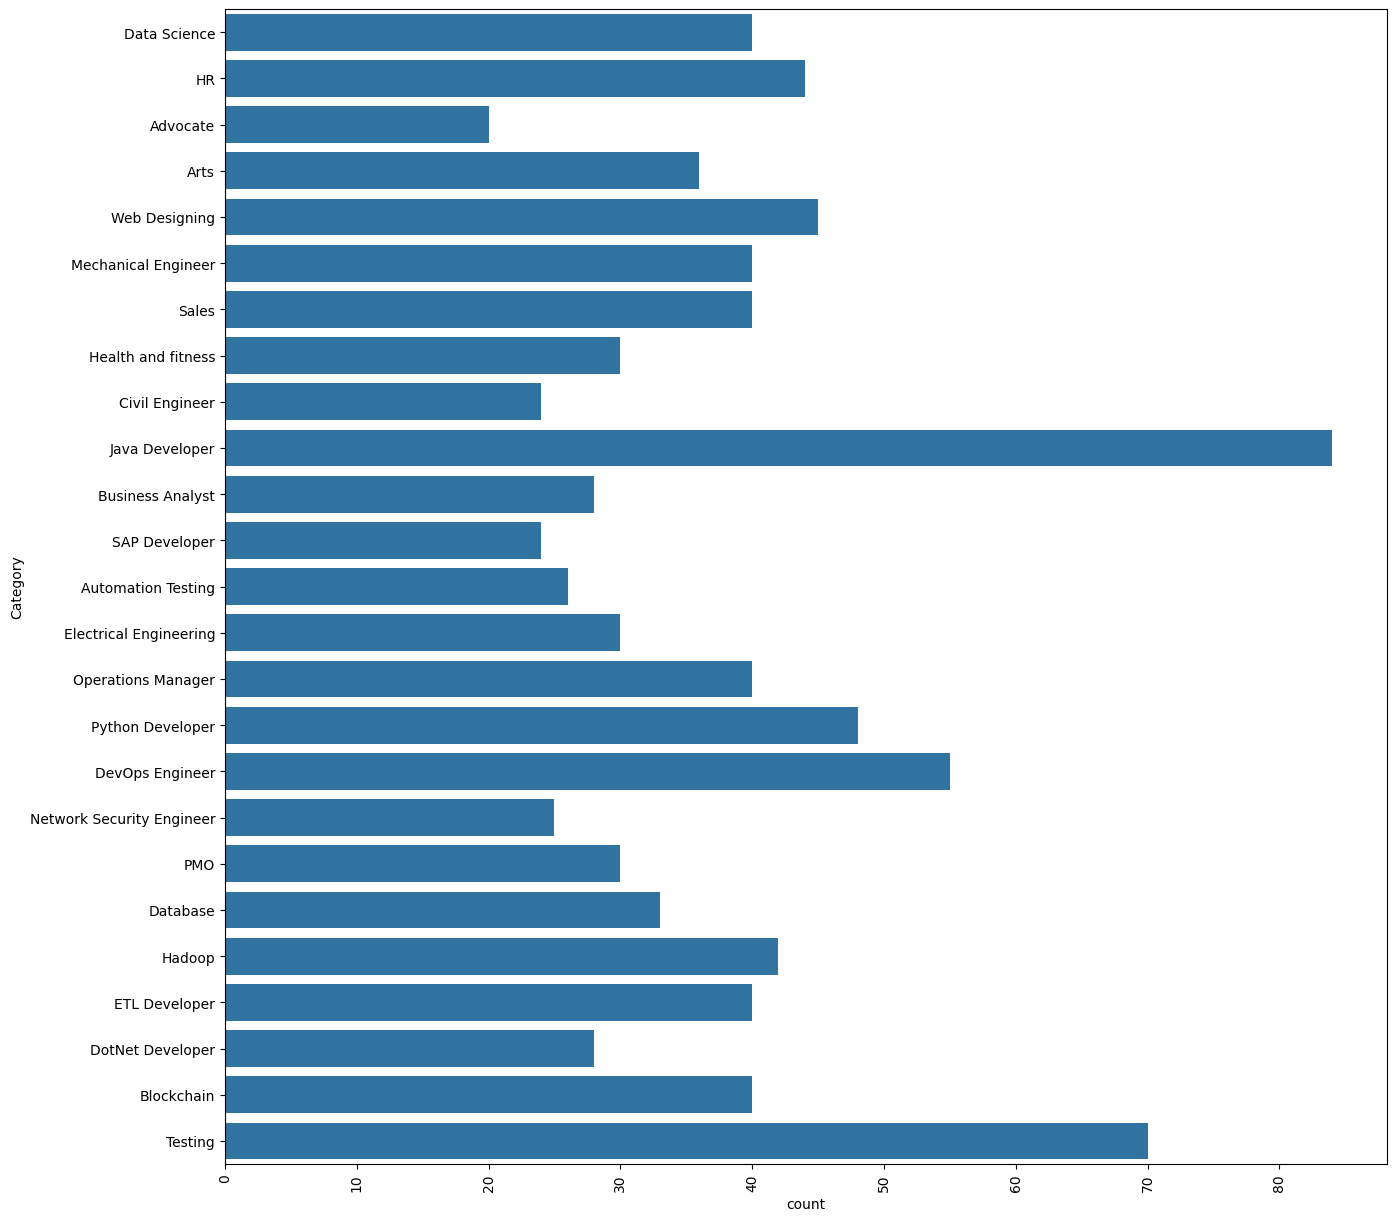

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(df['Category'])
plt.xticks()
plt.show()

([<matplotlib.patches.Wedge at 0x7efd5e8fbd00>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169057, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1

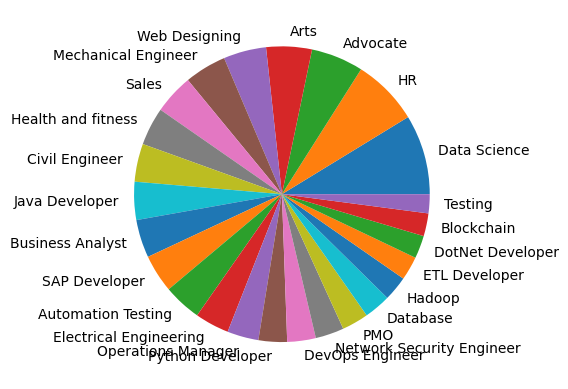

In [ ]:
plt.pie(df['Category'].value_counts(),labels=df['Category'].unique())

In [ ]:
df['Resume'][90]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

In [ ]:
import re
def clean_resume(text):
    text = re.sub('http\S+\s', ' ', text)
    text=re.sub('RT|cc',' ',text)
    #special character remove
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    text = re.sub('\s+',' ',text)
    text=re.sub('@\S+'' ','' ,text)
    text=re.sub('#\S+', ' ', text)

    return text

In [ ]:
clean_resume(df['Resume'][90])

'Skills Natural Languages Proficient in English Hindi and Marathi Computer skills Proficient with MS Office Internet operation Education Details January 2015 to January 2018 LLB Law Mumbai Maharashtra Mumbai university January 2015 B M M Mumbai Maharashtra S K Somaiya College Mumbai University H S C Asmita Girls junior College Maharashtra Board S S C Vidya Bhawan Maharashtra Board Advocate Llb student and Journalist Skill Details Company Details company Criminal lawyer law firm description '

In [ ]:
df['Category']

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [ ]:
df['Category']

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english')
x=tf.fit_transform(df['Resume'])

In [ ]:
x

<962x7384 sparse matrix of type '<class 'numpy.float64'>'
	with 164274 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,df['Category'],test_size=0.2,random_state=42)

In [37]:
print(x_train.shape, x_test.shape)

(769, 7384) (193, 7384)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
ypred=knn.predict(x_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
print(accuracy_score(y_test,ypred))

0.9844559585492227
